# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.055178e+01     6.486259e+00
 * time: 0.0019459724426269531
     1     2.935962e+01     4.769436e+00
 * time: 0.007784128189086914
     2     2.403063e+01     7.245466e+00
 * time: 0.01493692398071289
     3     2.217677e+01     9.025469e+00
 * time: 0.019701004028320312
     4     1.159684e+01     1.809816e+00
 * time: 0.024836063385009766
     5     1.005620e+01     1.325020e+00
 * time: 0.029083967208862305
     6     9.456629e+00     1.407428e+00
 * time: 0.032614946365356445
     7     9.089370e+00     9.261272e-01
 * time: 0.03604292869567871
     8     8.841659e+00     6.152374e-01
 * time: 0.03976607322692871
     9     8.635317e+00     6.100719e-01
 * time: 0.04367208480834961
    10     8.437844e+00     7.016382e-01
 * time: 0.04807615280151367
    11     8.270158e+00     4.509741e-01
 * time: 0.05278897285461426
    12     8.117316e+00     3.776533e-01
 * time: 0.05739998817443848
    13     7.988422e+00     6.065077e-01
 

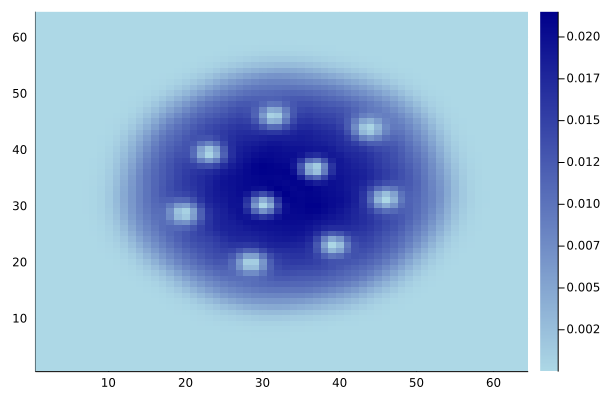

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)